In [11]:
import matplotlib.pyplot as plt 
import numpy as np
import random
from scipy.integrate import odeint

S(tmax)= 0.007885413265001136
I(tmax)= 6.339570277502093e-11
R(tmax)= 0.9921145866716035


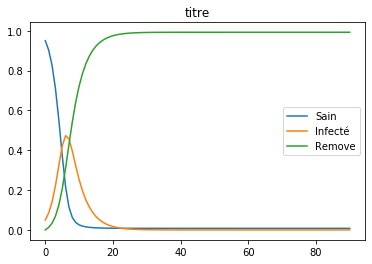

In [29]:
def graphe1(beta,gamma,tmax):
    temps = range(0,tmax,1) #pas de temps
    tmax = len(temps)
    S = [0.95]
    I = [0.05]
    R = [0]
    for i in range(tmax):
        """
        S(t+1) = S(t) - beta*S(t)*I(t)
        I(t+1) = I(t) + beta*S(t)*I(t) -gamma*I[t]
        R(t+1) = R(t) + (gamma)*I[t]
        
        """
        I.append(I[i]*(1 + (beta*S[i]) - gamma))
        S.append(S[i] - (beta*S[i]*I[i]))
        R.append(R[i] + (gamma)*I[i])
    print("S(tmax)=", S[tmax])
    print ("I(tmax)=",I[tmax])
    print("R(tmax)=",R[tmax])
    temps = range(0,(tmax+1),1) 
    plt.figure()
    plt.plot(temps,S,label='Sain')
    plt.plot(temps,I,label='Infecté')
    plt.plot(temps,R,label='Remove')
    plt.title("titre")
    plt.legend()
    
    
graphe1(1,0.25,tmax)

In [1]:
S0 = 100
I0 = 2
R0 = 0
def continu(beta,gamma,tmax):
    N = S0 + R0 + I0
    t = np.linspace(0,tmax+1,tmax+1)
    def derive(y,t,beta,gamma):    
        """
        dS/dt = (-beta*S*I)/N
        dI/dt = (beta*S*I)/N - gamma*I
        dR/dt = gamma*I
        """
        S,I,R = y
        dSdt = (-beta * S * I) / N
        dIdt = ((beta * S * I) / N) - (gamma*I)
        dRdt = (gamma) * I    
        return dSdt,dIdt,dRdt
    y0 = S0,I0,R0
    ret = odeint(derive,y0,t,args=(beta,gamma))
    S,I,R = ret.T
    temps = range(0,(tmax+1),1) 
    print("S(tmax)=", S[tmax])
    print ("I(tmax)=",I[tmax])
    print("R(tmax)=",R[tmax])
    plt.figure()
    plt.plot(t,S,label='sains')
    plt.plot(t,I,label='infectés')
    plt.plot(t,R,label='guéris')
    plt.legend()
    
continu(1,0.24,90)

NameError: name 'np' is not defined

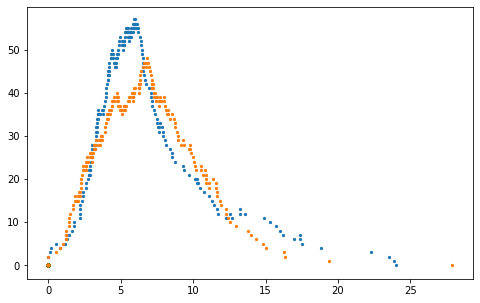

In [42]:
def simulation_continue(N=100,beta=1,gamma=0.25,dt=0.01,temps=2000,i0=2): 
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    I = np.zeros((temps)) 
    R = np.zeros((temps)) 
    S[0] = N-i0
    I[0] = i0
    R[0] = 0
    t[0] = 0
    i = 0 
    while I[i] > 0 and i < (temps-1): 
        U1 = np.random.rand() 
        U2 = np.random.rand() 
        a=(beta/N)*I[i]*S[i]+(gamma)*I[i]
        probi = (beta*S[i]/N)/(beta*S[i]/N + gamma) 
        h = - np.log(U1)/a
        t[i+1] = t[i] + h           
        if U2 <= probi: 
            S[i+1] = S[i] - 1  
            I[i+1] = I[i] + 1
            R[i+1] = R[i]
            
        else:                 
            S[i+1] = S[i]  
            I[i+1] = I[i] - 1
            R[i+1] = R[i] +1

        i += 1
        
    return t,S,I,R
t,S,I,R = simulation_continue()
t1,S1,I1,R1 = simulation_continue()
plt.figure(figsize=(8,5))
plt.scatter(t,I,s=5)
plt.scatter(t1,I1,s=5)